In [6]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the CSV files
nodes_df = pd.read_csv('nodes.csv')
edges_df = pd.read_csv('edges.csv')

# Clean column names (remove leading/trailing whitespace)
nodes_df.columns = nodes_df.columns.str.strip()
edges_df.columns = edges_df.columns.str.strip()

# Print column names to verify
print("Nodes columns:", nodes_df.columns)
print("Edges columns:", edges_df.columns)

Nodes columns: Index(['Id', 'label'], dtype='object')
Edges columns: Index(['Source', 'Target', 'Type', 'Name', 'Year', 'Partnerhip Type',
       'Weight'],
      dtype='object')


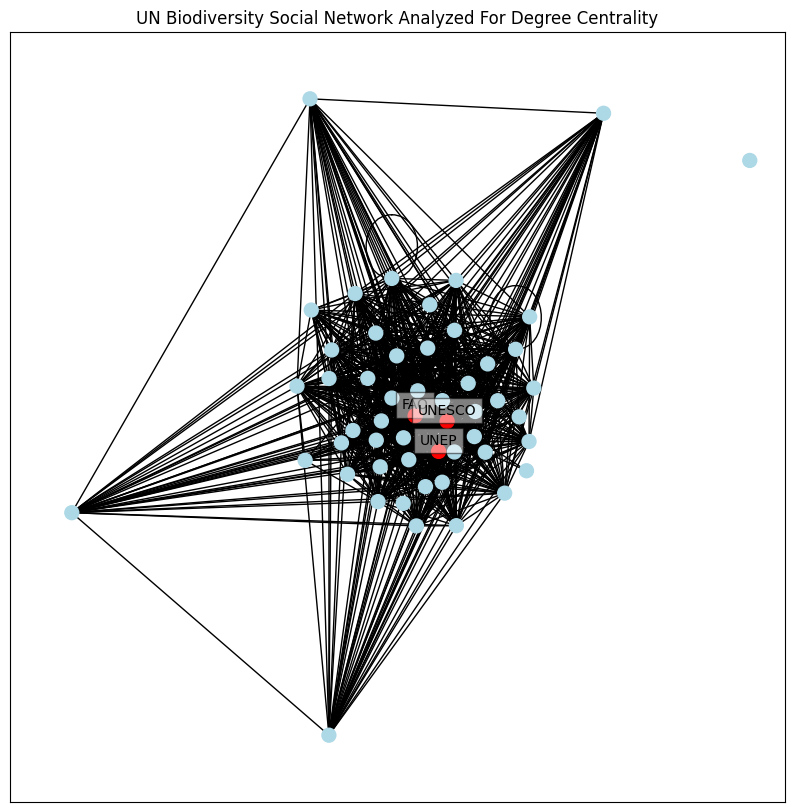

In [15]:

# Create a graph
G = nx.Graph()

# Check for NaN values in nodes dataframe
nodes_df = nodes_df.dropna(subset=['Id', 'label'])

# Add nodes from the nodes dataframe
for index, row in nodes_df.iterrows():
    G.add_node(row['Id'], label=row['label'])

# Add edges from the edges dataframe
for index, row in edges_df.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['Weight'])

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Get the top 3 nodes with highest degree centrality
top_3_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
top_3_nodes_ids = [node[0] for node in top_3_nodes]

# Get the labels for the top 3 nodes
top_3_labels = {node: nodes_df[nodes_df['Id'] == node]['label'].values[0] for node in top_3_nodes_ids}

# Increase spacing between nodes
pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(10, 10))

# Draw all nodes, with top 3 in red and others in orange, and make them small dots
node_colors = ['red' if node in top_3_nodes_ids else 'lightblue' for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=100)  # Set node size to small dots

# Draw edges
nx.draw_networkx_edges(G, pos)

# Add legend for top 3 nodes
for node in top_3_nodes_ids:
    plt.text(pos[node][0], pos[node][1]+0.02, s=top_3_labels[node], bbox=dict(facecolor='white', alpha=0.5), horizontalalignment='center')

plt.title("UN Biodiversity Social Network Analyzed For Degree Centrality")
plt.show()


In [19]:

# Get the top 10 nodes by degree centrality
top_10_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Create a DataFrame to display the top 10 nodes with their degree centrality and labels
top_10_df = pd.DataFrame(top_10_nodes, columns=['Node Id', 'Degree Centrality'])

# Add the corresponding labels from the nodes dataframe
top_10_df['Label'] = top_10_df['Node Id'].apply(lambda x: nodes_df[nodes_df['Id'] == x]['label'].values[0])

top_10_df

,Node Id,Degree Centrality,Label
0,18.0,0.942308,FAO
1,5.0,0.923077,UNEP
2,25.0,0.923077,UNESCO
3,45.0,0.923077,CBD
4,1.0,0.903846,UNDP
5,26.0,0.903846,UNIDO
6,28.0,0.884615,WBG
7,6.0,0.865385,UNHCR
8,8.0,0.865385,UN-HABITAT
9,29.0,0.865385,WHO


In [20]:
betweenness_centrality = nx.betweenness_centrality(G)

# Get the top 10 nodes by betweenness centrality
top_10_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Create a DataFrame to display the top 10 nodes with their betweenness centrality and labels
top_10_betweenness_df = pd.DataFrame(top_10_betweenness, columns=['Node Id', 'Betweenness Centrality'])

# Add the corresponding labels from the nodes dataframe
top_10_betweenness_df['Label'] = top_10_betweenness_df['Node Id'].apply(lambda x: nodes_df[nodes_df['Id'] == x]['label'].values[0])

# Display the top 10 nodes
top_10_betweenness_df

,Node Id,Betweenness Centrality,Label
0,5.0,0.050770,UNEP
1,45.0,0.034849,CBD
2,28.0,0.027572,WBG
3,18.0,0.024267,FAO
4,1.0,0.016106,UNDP
5,26.0,0.015565,UNIDO
6,25.0,0.012220,UNESCO
7,8.0,0.012111,UN-HABITAT
8,29.0,0.012111,WHO
9,17.0,0.010851,UNU


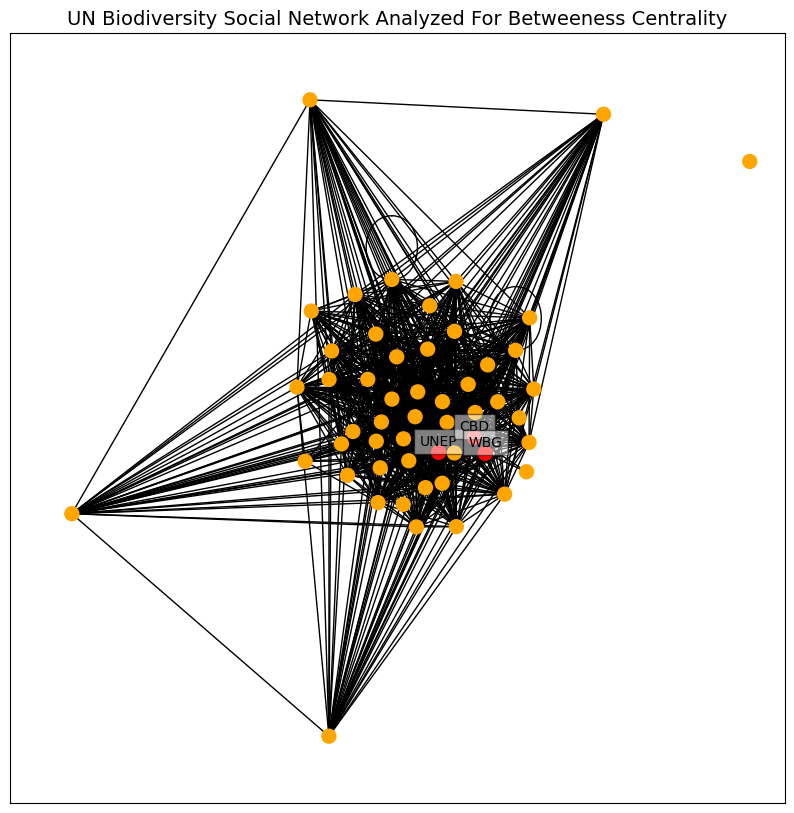

In [18]:

# Get the top 3 nodes with the highest betweenness centrality
top_3_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
top_3_betweenness_ids = [node[0] for node in top_3_betweenness]

# Get the labels for the top 3 nodes
top_3_betweenness_labels = {node: nodes_df[nodes_df['Id'] == node]['label'].values[0] for node in top_3_betweenness_ids}

# Increase spacing between nodes
pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(10, 10))

# Set node colors: Highlight top 3 betweenness centrality nodes in red, others in orange
node_colors = ['red' if node in top_3_betweenness_ids else 'orange' for node in G.nodes()]

# Set node sizes proportional to their betweenness centrality
node_sizes = 100 

# Draw the nodes and edges
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes)
nx.draw_networkx_edges(G, pos)

# Add labels for the top 3 nodes
for node in top_3_betweenness_ids:
    plt.text(pos[node][0], pos[node][1]+0.02, s=top_3_betweenness_labels[node], bbox=dict(facecolor='white', alpha=0.5), horizontalalignment='center')

# Add title and display
plt.title("UN Biodiversity Social Network Analyzed For Betweeness Centrality", fontsize=14)
plt.show()


In [23]:
# Find the node ID for WBG (World Bank Group) based on the label
wbg_id = nodes_df[nodes_df['label'] == 'WBG']['Id'].values[0]

# List all connections (edges) where WBG is either the source or target
wbg_connections = edges_df[(edges_df['Source'] == wbg_id) | (edges_df['Target'] == wbg_id)]

# Display the connections for WBG
wbg_connections


,Source,Target,Type,Name,Year,Partnerhip Type,Weight
46,1,28,Undirected,Biodiversity and the 2030 agenda for sustainab...,2016,Co-authorship,0.100000
49,18,28,Undirected,Biodiversity and the 2030 agenda for sustainab...,2016,Co-authorship,0.100000
53,5,28,Undirected,Biodiversity and the 2030 agenda for sustainab...,2016,Co-authorship,0.100000
54,45,28,Undirected,Biodiversity and the 2030 agenda for sustainab...,2016,Co-authorship,0.100000
82,1,28,Undirected,Blue Growth Initiative,2018,Collaborative partnerhip,0.333333
...,...,...,...,...,...,...,...
2107,8,28,Undirected,UN-WATER,1997,Coordinated activity,0.002151
2111,17,28,Undirected,UN-WATER,1997,Coordinated activity,0.002151
2115,28,4,Undirected,UN-WATER,1997,Coordinated activity,0.002151
2116,28,29,Undirected,UN-WATER,1997,Coordinated activity,0.002151


In [24]:
# Find the node ID for CBD (Convention on Biological Diversity) based on the label
cbd_id = nodes_df[nodes_df['label'] == 'CBD']['Id'].values[0]

# List all connections (edges) where CBD is either the source or target
cbd_connections = edges_df[(edges_df['Source'] == cbd_id) | (edges_df['Target'] == cbd_id)]

# Display the connections for CBD
cbd_connections


,Source,Target,Type,Name,Year,Partnerhip Type,Weight
21,1,45,Undirected,BES-Net Facility,2012,Collaborative partnerhip,0.035714
27,5,45,Undirected,BES-Net Facility,2012,Collaborative partnerhip,0.035714
32,13,45,Undirected,BES-Net Facility,2012,Collaborative partnerhip,0.035714
36,25,45,Undirected,BES-Net Facility,2012,Collaborative partnerhip,0.035714
39,22,45,Undirected,BES-Net Facility,2012,Collaborative partnerhip,0.035714
...,...,...,...,...,...,...,...
1623,45,29,Undirected,UN-WATER,1997,Coordinated activity,0.002151
1624,45,31,Undirected,UN-WATER,1997,Coordinated activity,0.002151
2128,45,25,Undirected,World Heritage Marine Programme,2020,Collaborative partnerhip,1.000000
2134,25,45,Undirected,YouthXchange guidebook series: Biodiversity an...,2015,Co-authorship,0.333333
